In [1]:
%pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries
import import_ipynb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import copy

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading stored data from another .ipynb file
%store -r data

In [4]:
# Viewinf head of the data 
data.head()

# Making a copy of the data for future use
data_copy = copy.copy(data)

# Exploratory Data Analysis

In [5]:
# Viewing the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [6]:
# Naming the values as per Data Definitions
EmpEducationLevel_mapping = {1:'Below College' ,2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'}
general_mapping = {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
PerformanceRating_mapping = {1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'}
EmpWorkLifeBalance_mapping = {1:'Bad', 2:'Good', 3:'Better', 4:'Best'}

data['EmpEducationLevel'] = data['EmpEducationLevel'].replace(EmpEducationLevel_mapping)
data['EmpEnvironmentSatisfaction'] = data['EmpEnvironmentSatisfaction'].replace(general_mapping)
data['EmpJobInvolvement'] = data['EmpJobInvolvement'].replace(general_mapping)
data['EmpJobSatisfaction'] = data['EmpJobSatisfaction'].replace(general_mapping)
data['PerformanceRating'] = data['PerformanceRating'].replace(PerformanceRating_mapping)
data['EmpRelationshipSatisfaction'] = data['EmpRelationshipSatisfaction'].replace(PerformanceRating_mapping)
data['EmpWorkLifeBalance'] = data['EmpWorkLifeBalance'].replace(PerformanceRating_mapping)

In [7]:
# Describing to see statistical values of the integer columns
data.describe()

,Age,DistanceFromHome,EmpHourlyRate,EmpJobLevel,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,65.981667,2.067500,2.665000,15.222500,11.330000,2.785833,7.077500,4.291667,2.194167,4.105000
std,9.087289,8.176636,20.211302,1.107836,2.469384,3.625918,7.797228,1.263446,6.236899,3.613744,3.221560,3.541576
min,18.000000,1.000000,30.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,48.000000,1.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,66.000000,2.000000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,83.000000,3.000000,4.000000,18.000000,15.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,100.000000,5.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Describing to see statistical values of the Categorical columns
data.describe(include=['O'])

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,EmpJobSatisfaction,OverTime,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Attrition,PerformanceRating
count,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,5,4,4,4,2,4,4,2,3
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,Bachelor,High,High,Very High,No,Excellent,Excellent,No,Excellent
freq,1,725,492,548,373,270,846,449,367,724,378,847,379,727,1022,874


In [9]:
# Taking out the Integer columns
data_int = data.select_dtypes(include='int').columns
print("Total number of Interger columns: ",data_int.nunique())
print(data_int)

Total number of Interger columns:  12
Index(['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpJobLevel',
       'NumCompaniesWorked', 'EmpLastSalaryHikePercent',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [10]:
# Taking out the Categorical columns
data_cat = data.select_dtypes(include='object').columns
print("Total number of Catgorical columns: ",data_cat.nunique())
print(data_cat)

Total number of Catgorical columns:  16
Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
       'EmpJobSatisfaction', 'OverTime', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance', 'Attrition', 'PerformanceRating'],
      dtype='object')


## Numerical Columns

## Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

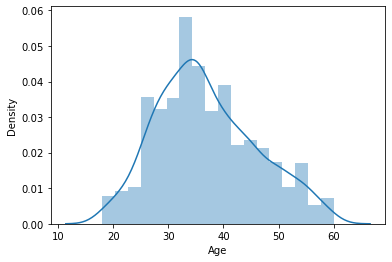

In [11]:
sns.distplot(data.Age)

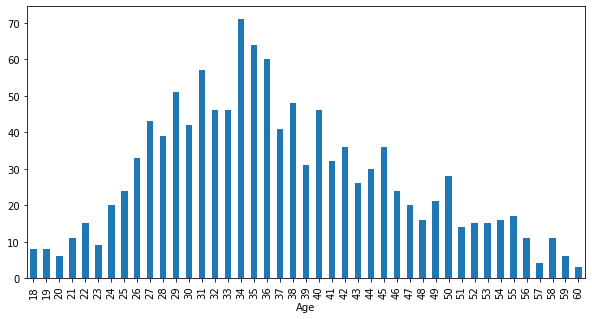

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
data.groupby('Age')['PerformanceRating'].count().plot.bar()
plt.show()

## DistanceFromHome

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

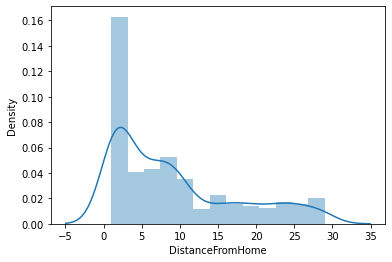

In [13]:
sns.distplot(data.DistanceFromHome)

## EmpHourlyRate

<AxesSubplot:xlabel='EmpHourlyRate', ylabel='Density'>

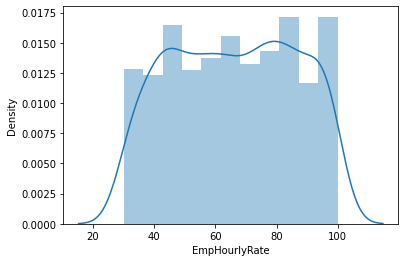

In [14]:
sns.distplot(data.EmpHourlyRate)

The data is evenly spread so can be ignored for Analysis

## EmpJobLevel

In [15]:
print("The total number of values in column:",data.EmpJobLevel.nunique())

The total number of values in column: 5


In [16]:
print("The Unique values are:",data.EmpJobLevel.unique())

The Unique values are: [2 3 5 1 4]


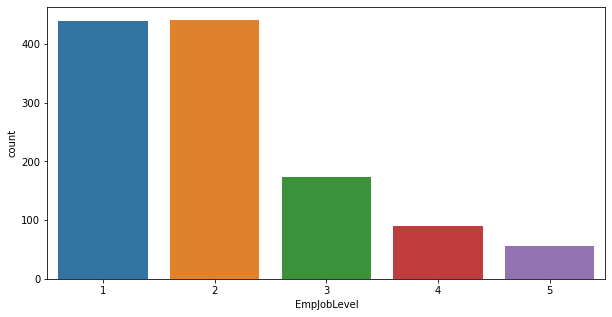

In [17]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = data.EmpJobLevel)
plt.show()

## NumCompaniesWorked

In [18]:
print("The total number of values in column:",data.NumCompaniesWorked.nunique())

The total number of values in column: 10


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

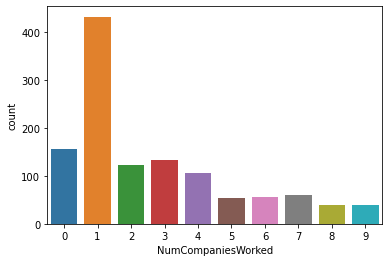

In [19]:
sns.countplot(data.NumCompaniesWorked)

## EmpLastSalaryHikePercent

In [20]:
print("Minimum:",data.EmpLastSalaryHikePercent.min(),"\n Maximum:", data.EmpLastSalaryHikePercent.max())

Minimum: 11 
 Maximum: 25


In [21]:
print("The Unique values are:",data.EmpLastSalaryHikePercent.unique())

The Unique values are: [12 21 15 14 13 23 11 20 19 17 18 22 16 24 25]


In [22]:
print("Most of the employee got hike of:", int(data.EmpLastSalaryHikePercent.mode()),"%")

Most of the employee got hike of: 14 %


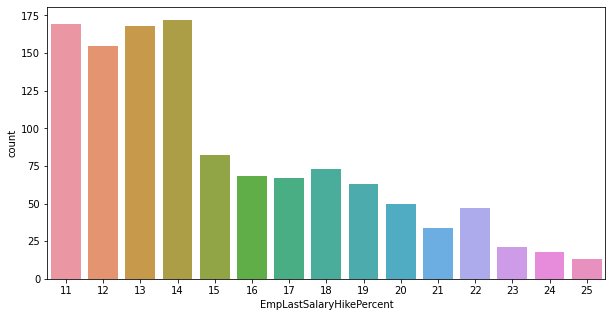

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data.EmpLastSalaryHikePercent)
plt.show()

## TotalWorkExperienceInYears

In [24]:
print("Maximum :",data.TotalWorkExperienceInYears.max())

Maximum : 40


In [25]:
print("The Unique values are:",data.TotalWorkExperienceInYears.unique())

The Unique values are: [10 20 23  9  4 28  1  7 12 30  5  2 19 16 34  6  8 11 17  3 14 26 13 22
  0 29 18 35 33 31 24 15 32 21 27 25 36 37 38 40]


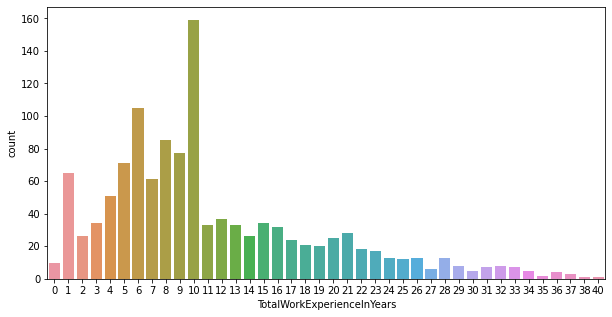

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data.TotalWorkExperienceInYears)
plt.show()

## TrainingTimesLastYear

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Count'>

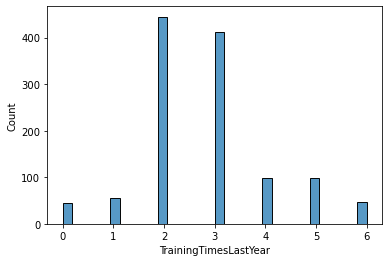

In [27]:
sns.histplot(data.TrainingTimesLastYear)

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

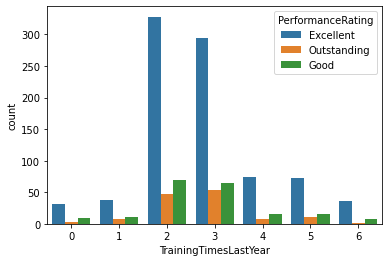

In [28]:
sns.countplot(x = data.TrainingTimesLastYear, hue = data.PerformanceRating)

## ExperienceYearsAtThisCompany

<AxesSubplot:xlabel='ExperienceYearsAtThisCompany', ylabel='Count'>

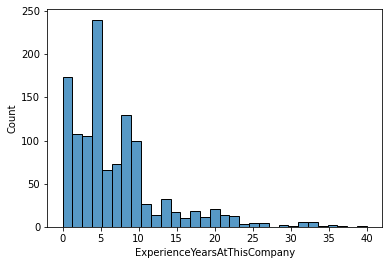

In [29]:
sns.histplot(data.ExperienceYearsAtThisCompany)

## ExperienceYearsInCurrentRole

<AxesSubplot:xlabel='ExperienceYearsInCurrentRole', ylabel='Count'>

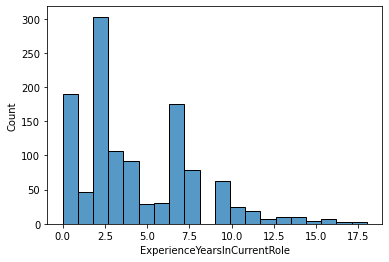

In [30]:
sns.histplot(data.ExperienceYearsInCurrentRole)

## YearsSinceLastPromotion

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Count'>

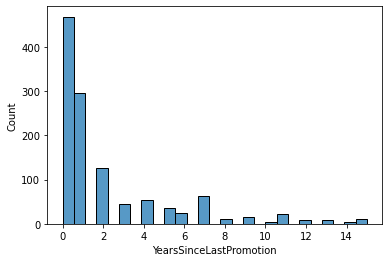

In [31]:
sns.histplot(data.YearsSinceLastPromotion)

## YearsWithCurrManager

In [32]:
print("The total number of values in column:",data.YearsWithCurrManager.nunique())

The total number of values in column: 18


In [33]:
print("The Unique values are:",data.YearsWithCurrManager.unique())

The Unique values are: [ 8  7 12  6  2  5  0  4 13  3  1 16  9 17 11 10 14 15]


<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Count'>

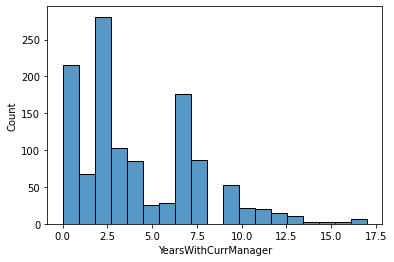

In [34]:
sns.histplot(data.YearsWithCurrManager)

## Categorical Features

## Gender

In [35]:
print("The total number of values in column:",data.Gender.nunique())

The total number of values in column: 2


In [36]:
print("The Unique values are:",data.Gender.unique())

The Unique values are: ['Male' 'Female']


<AxesSubplot:title={'center':'Gender'}, ylabel='None'>

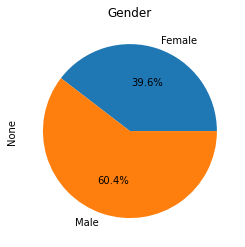

In [37]:
data.groupby('Gender').size().plot(kind='pie', labels=['Female','Male'], title = 'Gender', autopct='%1.1f%%')

## EducationBackground

In [38]:
print("The total number of values in column:",data.EducationBackground.nunique())

The total number of values in column: 6


In [39]:
print("The Unique values are:",data.EducationBackground.unique())

The Unique values are: ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']


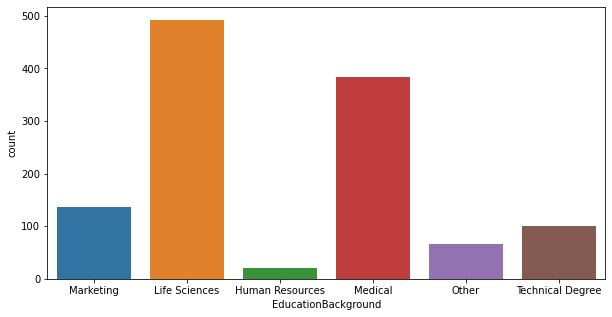

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x = data.EducationBackground)
plt.show()

## MaritalStatus

In [41]:
print("The total number of values in column:",data.MaritalStatus.nunique())

The total number of values in column: 3


In [42]:
print("The Unique values are:",data.MaritalStatus.unique())

The Unique values are: ['Single' 'Married' 'Divorced']


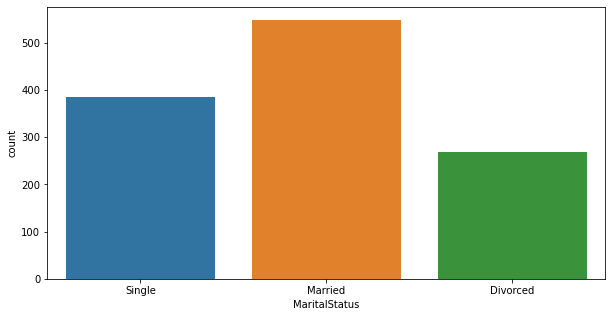

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x = data.MaritalStatus)
plt.show()

## EmpDepartment

In [44]:
print("The total number of values in column:",data.EmpDepartment.nunique())

The total number of values in column: 6


In [45]:
print("The Unique values are:",data.EmpDepartment.unique())

The Unique values are: ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']


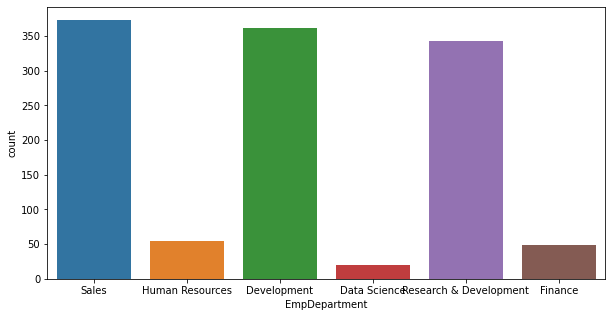

In [46]:
# Department wise performances
plt.figure(figsize=(10,5))
sns.countplot(x = data.EmpDepartment)
plt.show()

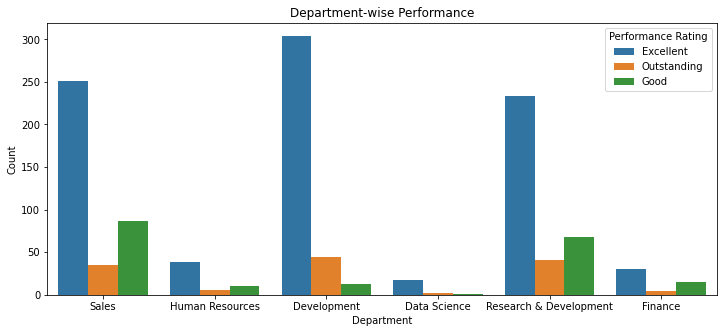

In [47]:
plt.figure(figsize=(12, 5))
sns.countplot(x='EmpDepartment', hue='PerformanceRating', data = data)
plt.title('Department-wise Performance')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Performance Rating')
plt.show()

## EmpJobRole

In [48]:
print("The total number of values in column:",data.EmpJobRole.nunique())

The total number of values in column: 19


In [49]:
print("The Unique values are:",data.EmpJobRole.unique())

The Unique values are: ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']


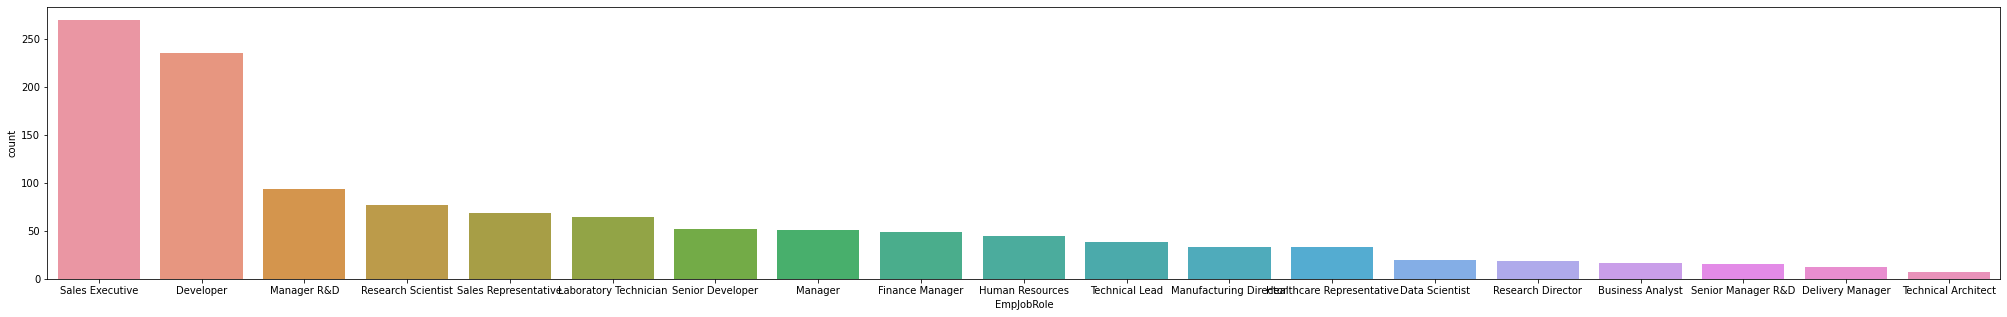

In [50]:
plt.figure(figsize=(35,5))
sns.countplot(x = data.EmpJobRole, order=data['EmpJobRole'].value_counts().index)
plt.show()

## BusinessTravelFrequency

In [51]:
print("The total number of values in column:",data.BusinessTravelFrequency.nunique())

The total number of values in column: 3


In [52]:
print("The Unique values are:",data.BusinessTravelFrequency.unique())

The Unique values are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


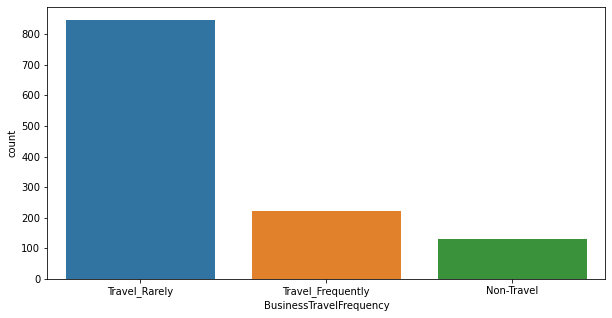

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x = data.BusinessTravelFrequency)
plt.show()

## EmpEducationLevel

In [54]:
print("The total number of values in column:",data.EmpEducationLevel.nunique())

The total number of values in column: 5


In [55]:
print("The Unique values are:",data.EmpEducationLevel.unique())

The Unique values are: ['Bachelor' 'Master' 'College' 'Doctor' 'Below College']


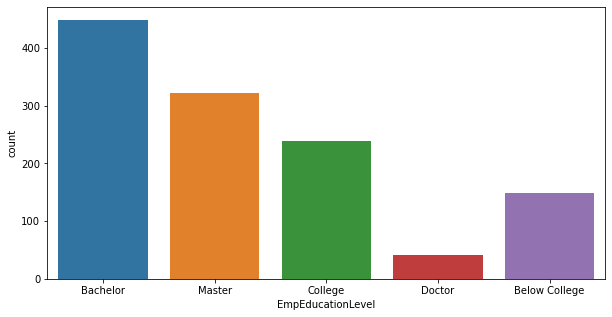

In [56]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = data.EmpEducationLevel)
plt.show()

## EmpEnvironmentSatisfaction

In [57]:
print("The total number of values in column:",data.EmpEnvironmentSatisfaction.nunique())

The total number of values in column: 4


In [58]:
print("The Unique values are:",data.EmpEnvironmentSatisfaction.unique())

The Unique values are: ['Very High' 'Medium' 'Low' 'High']


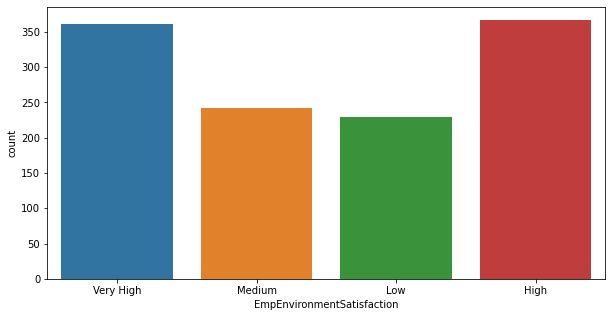

In [59]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = data.EmpEnvironmentSatisfaction)
plt.show()

## EmpJobInvolvement

In [60]:
print("The total number of values in column:",data.EmpJobInvolvement.nunique())

The total number of values in column: 4


In [61]:
print("The Unique values are:",data.EmpJobInvolvement.unique())

The Unique values are: ['High' 'Medium' 'Low' 'Very High']


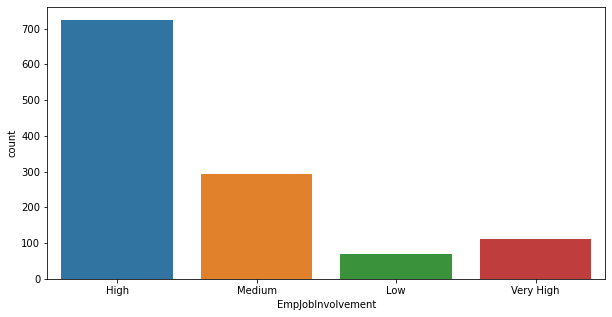

In [62]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = data.EmpJobInvolvement)
plt.show()

## EmpJobSatisfaction

In [63]:
print("The total number of values in column:",data.EmpJobSatisfaction.nunique())

The total number of values in column: 4


In [64]:
print("The Unique values are:",data.EmpJobSatisfaction.unique())

The Unique values are: ['Very High' 'Low' 'Medium' 'High']


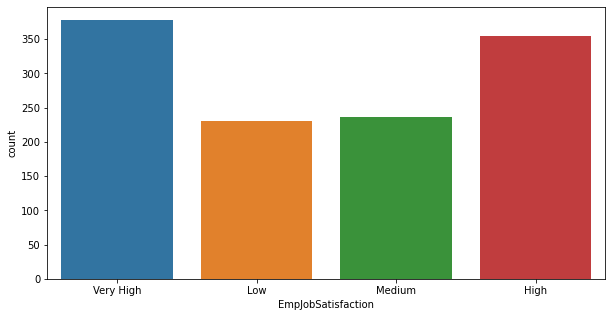

In [65]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = data.EmpJobSatisfaction)
plt.show()

### Over Time

In [66]:
print("The total number of values in column:",data.OverTime.nunique())

The total number of values in column: 2


In [67]:
print("The Unique values are:",data.OverTime.unique())

The Unique values are: ['No' 'Yes']


<AxesSubplot:title={'center':'Over Time'}, ylabel='None'>

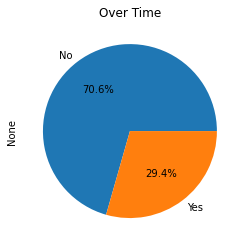

In [68]:
data.groupby('OverTime').size().plot(kind='pie', labels=['No','Yes'], title = 'Over Time', autopct='%1.1f%%')

## EmpRelationshipSatisfaction

In [69]:
print("The total number of values in column:",data.EmpRelationshipSatisfaction.nunique())

The total number of values in column: 4


In [70]:
print("The Unique values are:",data.EmpRelationshipSatisfaction.unique())

The Unique values are: ['Outstanding' 'Excellent' 'Good' 'Low']


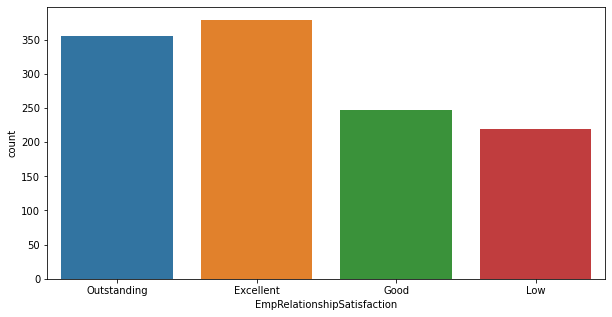

In [71]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = data.EmpRelationshipSatisfaction)
plt.show()

## EmpWorkLifeBalance

In [72]:
print("The total number of values in column:",data.EmpWorkLifeBalance.nunique())

The total number of values in column: 4


In [73]:
print("The Unique values are:",data.EmpWorkLifeBalance.unique())

The Unique values are: ['Good' 'Excellent' 'Outstanding' 'Low']


<AxesSubplot:title={'center':'Work Life Balance'}, ylabel='None'>

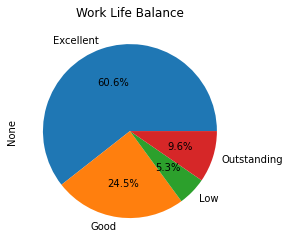

In [74]:
data.groupby('EmpWorkLifeBalance').size().plot(kind='pie', labels=['Excellent','Good','Low','Outstanding'], title = 'Work Life Balance', autopct='%1.1f%%')

## Attrition

In [75]:
print("The total number of values in column:",data.Attrition.nunique())

The total number of values in column: 2


In [76]:
print("The Unique values are:",data.Attrition.unique())

The Unique values are: ['No' 'Yes']


<AxesSubplot:title={'center':'Work Life Balance'}, ylabel='None'>

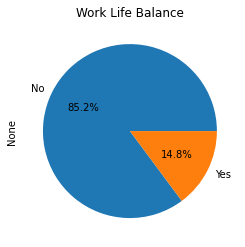

In [77]:
data.groupby('Attrition').size().plot(kind='pie', labels=['No','Yes'], title = 'Work Life Balance', autopct='%1.1f%%')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

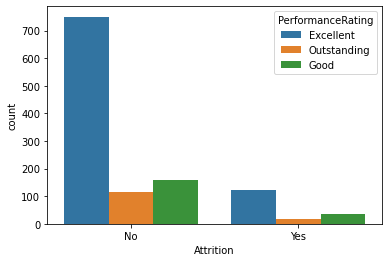

In [78]:
sns.countplot(data.Attrition, hue = data.PerformanceRating)

## PerformanceRating

In [79]:
print("The total number of values in column:",data.PerformanceRating.nunique())

The total number of values in column: 3


In [80]:
print("The Unique values are:",data.PerformanceRating.unique())

The Unique values are: ['Excellent' 'Outstanding' 'Good']


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

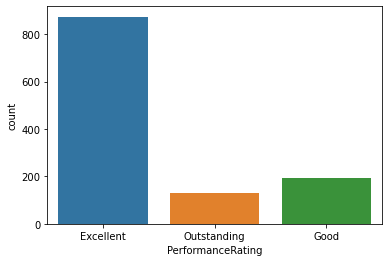

In [81]:
sns.countplot(data.PerformanceRating)

In [82]:
data = data.drop(['EmpNumber'],axis=1)

In [83]:
# Giving label for catogorical columns
label_encoder = LabelEncoder()

for i in data:
    data[i]= label_encoder.fit_transform(data[i])

In [84]:
data_corr = data.corr()

In [85]:
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,14,1,2,2,5,13,2,9,0,3,...,3,10,2,1,10,7,0,8,0,0
1,29,1,2,2,5,13,2,13,4,3,...,3,20,2,0,7,7,1,7,0,0
2,22,1,1,1,5,13,1,4,4,3,...,0,20,2,0,18,13,1,12,0,2
3,23,1,0,0,3,8,2,9,4,2,...,1,23,2,1,21,6,12,6,0,0
4,42,1,2,2,5,13,2,15,4,1,...,3,10,1,0,2,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,9,0,3,0,5,13,1,2,1,3,...,1,6,3,0,6,5,0,4,0,2
1196,19,1,1,2,1,15,2,9,2,3,...,2,4,2,0,1,0,0,0,0,0
1197,32,1,3,1,1,15,2,27,1,3,...,0,20,3,0,20,8,3,8,0,0
1198,16,0,3,2,0,1,2,8,0,3,...,1,9,3,3,8,7,7,7,0,0


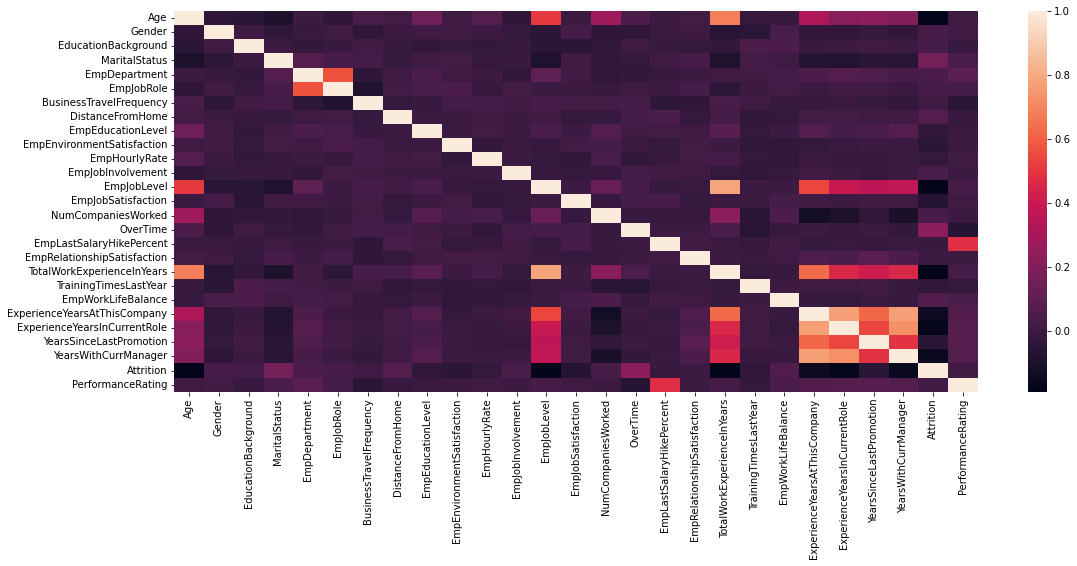

In [86]:
plt.figure(figsize = (18, 7))
sns.heatmap(data_corr)
plt.show()

In [87]:
table = data_corr['PerformanceRating'].sort_values(ascending=False)
table

PerformanceRating               1.000000
EmpLastSalaryHikePercent        0.482843
EmpDepartment                   0.091329
YearsSinceLastPromotion         0.077439
ExperienceYearsInCurrentRole    0.070861
YearsWithCurrManager            0.064807
ExperienceYearsAtThisCompany    0.061544
EmpWorkLifeBalance              0.046851
MaritalStatus                   0.043447
EmpJobLevel                     0.035756
EmpJobRole                      0.029358
TotalWorkExperienceInYears      0.026491
Attrition                       0.014108
EmpHourlyRate                   0.013218
Gender                          0.010830
Age                             0.008342
EmpJobSatisfaction              0.008263
NumCompaniesWorked              0.005215
EmpRelationshipSatisfaction     0.001102
EmpJobInvolvement              -0.001556
EmpEnvironmentSatisfaction     -0.002913
EmpEducationLevel              -0.005774
EducationBackground            -0.010018
DistanceFromHome               -0.012072
TrainingTimesLas

In [88]:
# Storing the Dataframe Data
%store data

Stored 'data' (DataFrame)


### Numerical features analysis

1) The Age distribution ranges from 18 to 60, but most of the employees are in between the range of 30 to 40 age.

2) Most of the employees lives nearly 0 – 5 Kms or Miles from Office.

3) Most of the employees work as low-level job in the Organization.

4) The organization is mostly considered to be the second company for the Employees.

5) The company has offered minimum of 11% and Maximum of 25%, but most of the employee has received low percentage hike of 11- 14%.

6) Most likely the employees are staying in this company for about 5 years.

7) The employees undergo 2 – 3 training in the last year.



### Categorical features Analysis

1) There are 60% of Male and 40% Female working in this Company.

2) Most of the Employees are from Life Science and Medical Background.

3) The Employees are mostly Working in Sale, Development, Research and Development Department and Least working Employees are from Data Science Department.

4) Sale Executive and Developer are the top 2 departments where Employee count is high.

5) Most of the Employee’s work doesn’t involve travelling for work.

6) Most of the Employee have completed their Bachelor degree.

7) Most of the Employee’s Job Satisfaction, Environment Satisfaction and Job Involvement is High.

8) 71% of Employees are not working Over Time.

9) The 85% of employees are not having attrition in their work.

### Correlation Analysis

1) EmpLastSalaryHikePercent, EmpDepartment,YearsSinceLastPromotion, ExperienceYearsInCurrentRole, YearsWithCurrManager, ExperienceYearsAtThisCompany are having the positive correlation when comparing to all features.

2) EducationBackground, DistanceFromHome, TrainingTimesLastYear, BusinessTravelFrequency, OverTime are the features which are negatively correlate with the Perfomance Rating                      

3) People who have more experience with the company has the more probability to get the promotion from the correlation between them.
